

# Classification

**Binary Classification**   
**Multiclass Classification**    
**Multilabel Classification**    




In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)

In [2]:
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
pd.DataFrame({})

""


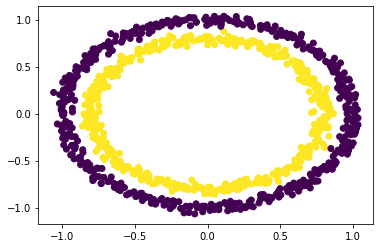

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis');

In [6]:
# Create a model
model_1 = tf.keras.Sequential([
              tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 4ms/step - loss: 4.2025 - accuracy: 0.4800
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 1.1338 - accuracy: 0.5020
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7248 - accuracy: 0.4930
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7031 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.4980


In [7]:
model_1.predict(X)[:10]

array([[0.44295695],
       [0.5238541 ],
       [0.527079  ],
       [0.5056246 ],
       [0.4571458 ],
       [0.510199  ],
       [0.48547348],
       [0.44184008],
       [0.49020553],
       [0.49175704]], dtype=float32)

In [8]:
# Plot a decision boundry

def plot_decision_boundary(model, X, y):

  """
  Plots the decision boundary created by a model predicting on x
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create a value (we are going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stake a 2d array togeather

  # Make prediction
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print('Doing Multiclass prediction')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('Doing Binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot the decision boundry
  plt.contourf(xx, yy, y_pred, cmap='viridis', alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='inferno')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Doing Binary classification


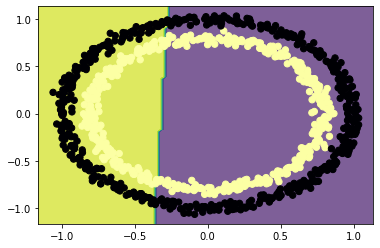

In [9]:
plot_decision_boundary(model_1, X, y)

In [10]:
# Create a model with non linear

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
              tf.keras.layers.Dense(4, activation='relu'),
              tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
              tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

Doing Binary classification


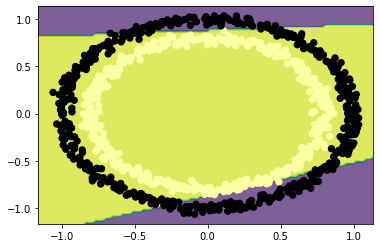

In [11]:
plot_decision_boundary(model_2, X, y)

In [12]:
# Creating another model

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                tf.keras.layers.Dense(4, activation='relu'),
                tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=['accuracy'])

model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 7ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

Doing Binary classification


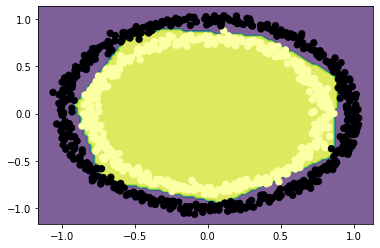

In [13]:
plot_decision_boundary(model_3, X, y)

In [14]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [15]:
# Create a model

model_4 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(4, activation='relu'),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer='Adam',
                metrics=['accuracy'])

# Every epoch it incress
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_4 = model_4.fit(x_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6942 - accuracy: 0.4913 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.4938 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.4900 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4950 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6934 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.4938 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.4950 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss:

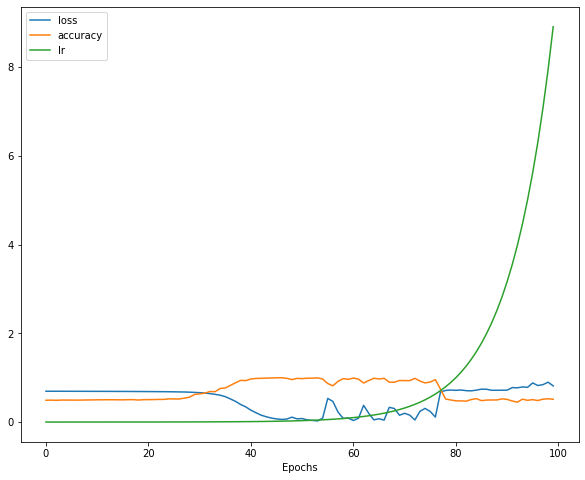

In [16]:
# 1e-4 * 10**(1e-4/20)
pd.DataFrame(history_4.history).plot(figsize=(10, 8), xlabel='Epochs');

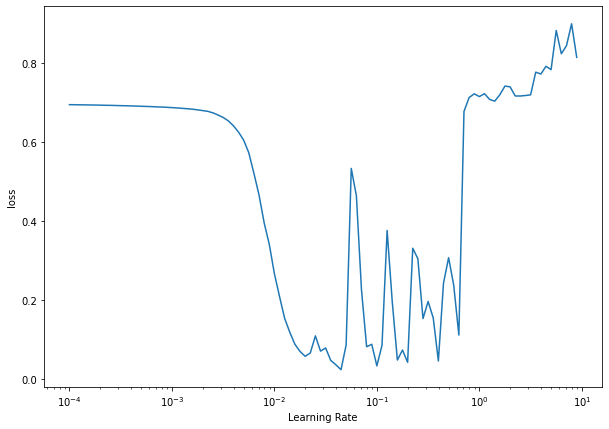

In [17]:
# Plot the learning rate vs loss
# Did not understand properly
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_4.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('loss');

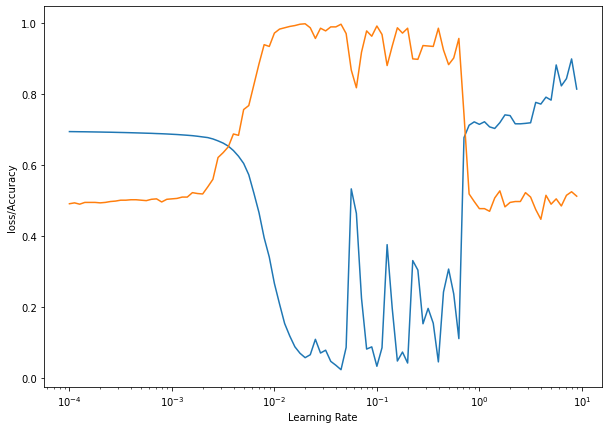

In [18]:
# Plot the learning rate vs loss
plt.figure(figsize=(10, 7))
plt.semilogx(history_4.history['lr'], history_4.history['loss'])
plt.semilogx(history_4.history['lr'], history_4.history['accuracy'])
plt.xlabel('Learning Rate')
plt.ylabel('loss/Accuracy');

In [19]:
# Create a model by learning rate of above graph

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.025),
                metrics=['accuracy'])

history_5 = model_5.fit(x_train, y_train, epochs=30)

Epoch 1/30
25/25 [==============================] - 1s 3ms/step - loss: 0.6794 - accuracy: 0.5738
Epoch 2/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6660 - accuracy: 0.5813
Epoch 3/30
25/25 [==============================] - 0s 4ms/step - loss: 0.6455 - accuracy: 0.6137
Epoch 4/30
25/25 [==============================] - 0s 3ms/step - loss: 0.6121 - accuracy: 0.6350
Epoch 5/30
25/25 [==============================] - 0s 3ms/step - loss: 0.5304 - accuracy: 0.7462
Epoch 6/30
25/25 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.8200
Epoch 7/30
25/25 [==============================] - 0s 3ms/step - loss: 0.3095 - accuracy: 0.9500
Epoch 8/30
25/25 [==============================] - 0s 3ms/step - loss: 0.2095 - accuracy: 0.9800
Epoch 9/30
25/25 [==============================] - 0s 3ms/step - loss: 0.1555 - accuracy: 0.9812
Epoch 10/30
25/25 [==============================] - 0s 3ms/step - loss: 0.1162 - accuracy: 0.9837
Epoch 11/30
25/25 [

In [20]:
# a = history_5 # History save when we run learning rate at o.2

In [21]:
pd.DataFrame(a.history).plot()
pd.DataFrame(history_5.history).plot()

NameError: ignored

In [ ]:
plt.plot(history_5.history['accuracy'], c='orange')
plt.plot(history_5.history['loss'], c='blue')
plt.plot(a.history['accuracy'], c='red')
plt.plot(a.history['loss'], c='black')

In [ ]:
model_5.evaluate(x_test, y_test)

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_5.evaluate(x_test, y_test)
loss, accuracy

In [ ]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model_5.predict(x_test)
confusion_matrix(y_test, tf.round(y_pred))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred));

# Working with a large example (Multiclass classification)

In [22]:
from tensorflow.keras.datasets import fashion_mnist

# The data is already processed
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [23]:
train_data[0], train_data[0].shape, train_labels[0], train_labels.shape,train_data.shape

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

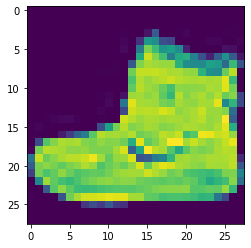

In [24]:
# Ploat a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0]);

In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

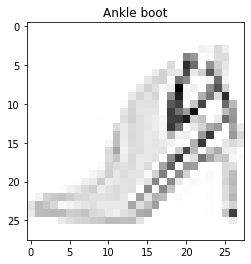

In [26]:
# Plot a example image and its label
index = 1480
plt.imshow(train_data[index], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index]]);

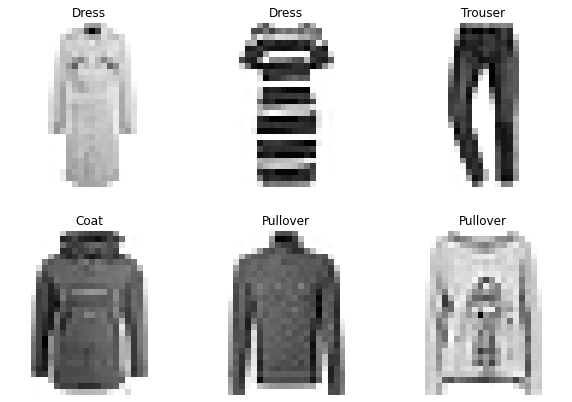

In [27]:
# Ploat a random Many Image
import random
plt.figure(figsize=(10, 7))
for i in range(6):
  ax = plt.subplot(2, 3, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [28]:
# Create a model
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)), # ValueError: Shapes (32,) and (32, 28, 10) are incompatible
            # Flatten use for converting any shape into a single vector. here (28, 28) converted into (None, 784)
            tf.keras.layers.Dense(4, activation='relu'),
            tf.keras.layers.Dense(4, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax') # label is 10 thus we need 10 output and for multiclass clacification use softmax.
])

model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # ValueError: Shapes (32, 1) and (32, 10) are incompatible Because of CategoricalCrossentropy
                # If we use CategoricalCrossentropy we need the train labels into onehot encoding or use SparseCategoricalCrossentropy()
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

non_norm_history = model_6.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_accurac

In [29]:
tf.one_hot(train_labels, depth=10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [30]:
# Create a same but using one hot encoding
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
            tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
            tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_7.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

model_7.fit(train_data, tf.one_hot(train_labels, depth=10), epochs=10, validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 2.1772 - accuracy: 0.1593 - val_loss: 1.8122 - val_accuracy: 0.2049
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.7162 - accuracy: 0.2447 - val_loss: 1.6517 - val_accuracy: 0.2895
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 1.6362 - accuracy: 0.2834 - val_loss: 1.6411 - val_accuracy: 0.3092
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.6066 - accuracy: 0.2948 - val_loss: 1.6071 - val_accuracy: 0.2957
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.6069 - accuracy: 0.3020 - val_loss: 1.5915 - val_accuracy: 0.2866
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 1.5841 - accuracy: 0.3118 - val_loss: 1.5669 - val_accuracy: 0.3257
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5818 - accuracy: 0.3174 - val_loss: 1.5601 - val_ac

In [31]:
train_data.min(), train_data.max()

(0, 255)

In [32]:
train_data_norm = train_data/255.0
test_data_norm = test_data/255.0

In [33]:
train_data_norm.min(), train_data_norm.max(), test_data_norm.min(), test_data_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [34]:
# Create a same model and use Normalized values to see the effect

tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
            tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
            tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

norm_history = model_8.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_ac

In [35]:
non_norm_history.history

{'accuracy': [0.15934999287128448,
  0.2446500062942505,
  0.28341665863990784,
  0.2948000133037567,
  0.3019833266735077,
  0.3117833435535431,
  0.31736665964126587,
  0.31478333473205566,
  0.32501667737960815,
  0.32011666893959045],
 'loss': [2.177182912826538,
  1.7161673307418823,
  1.6361984014511108,
  1.6065994501113892,
  1.6068710088729858,
  1.5841484069824219,
  1.5817512273788452,
  1.578378677368164,
  1.5713163614273071,
  1.5689232349395752],
 'val_accuracy': [0.20489999651908875,
  0.28949999809265137,
  0.3091999888420105,
  0.2957000136375427,
  0.2865999937057495,
  0.3257000148296356,
  0.328900009393692,
  0.326200008392334,
  0.31380000710487366,
  0.304500013589859],
 'val_loss': [1.8121668100357056,
  1.6516988277435303,
  1.6410940885543823,
  1.607116937637329,
  1.5915027856826782,
  1.5668646097183228,
  1.5601391792297363,
  1.576631784439087,
  1.5651659965515137,
  1.5680228471755981]}

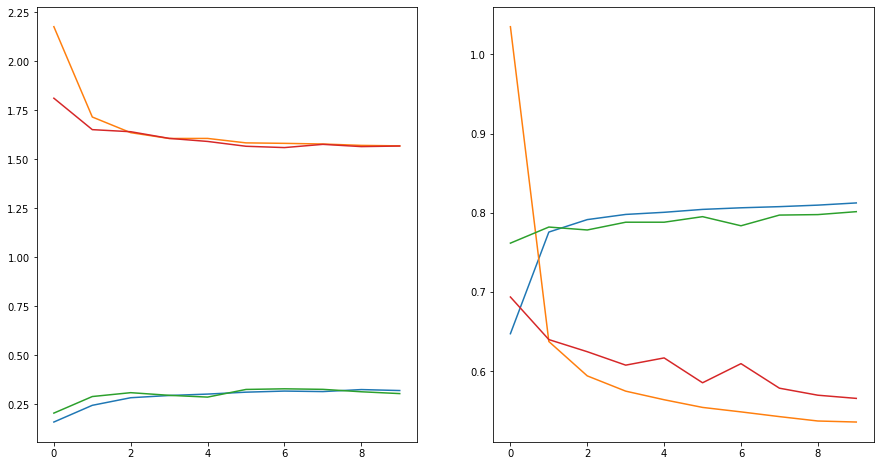

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax1.plot(non_norm_history.history['accuracy'])
ax1.plot(non_norm_history.history['loss'])
ax1.plot(non_norm_history.history['val_accuracy'])
ax1.plot(non_norm_history.history['val_loss'])
ax2.plot(norm_history.history['accuracy'])
ax2.plot(norm_history.history['loss'])
ax2.plot(norm_history.history['val_accuracy'])
ax2.plot(norm_history.history['val_loss'])

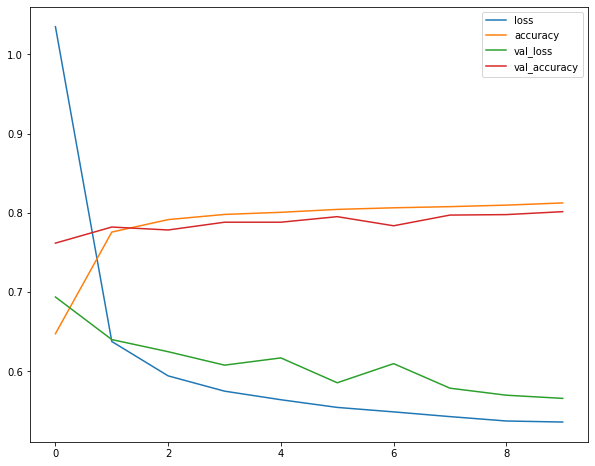

In [37]:
pd.DataFrame(norm_history.history).plot(figsize=(10, 8));

In [41]:
# Find a ideal Learning Rate On Normalized data

tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
          tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))

find_lr_history = model_9.fit(train_data_norm, 
                              train_labels, 
                              epochs=40, 
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] -

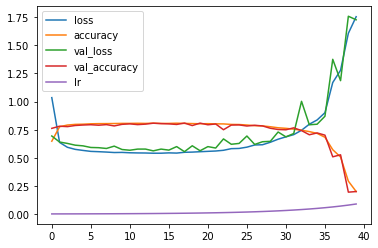

In [43]:
pd.DataFrame(find_lr_history.history).plot()

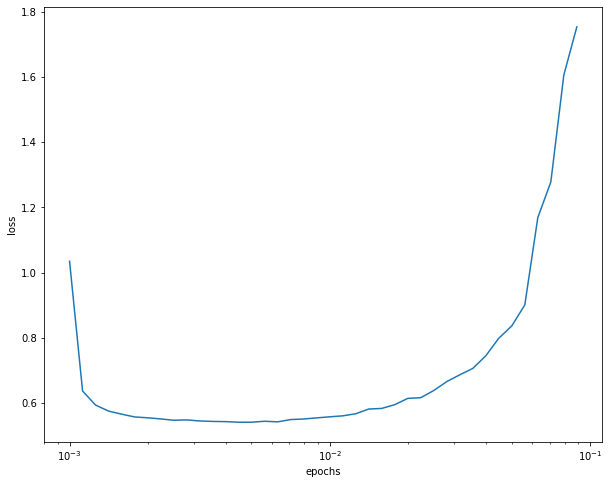

In [44]:
plt.figure(figsize=(10, 8))
plt.semilogx(find_lr_history.history['lr'], find_lr_history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss');

In [53]:
y_probs = model_8.predict(test_data_norm)
y_probs[:2]

array([[2.6757513e-10, 8.3621524e-15, 4.8127007e-05, 3.4011531e-08,
        1.2373619e-04, 2.7335337e-01, 3.3961314e-07, 8.8270180e-02,
        6.1673550e-03, 6.3203692e-01],
       [8.1287777e-05, 5.7615926e-15, 9.4907796e-01, 7.8099544e-07,
        8.8746613e-03, 8.5991284e-13, 4.1794293e-02, 5.2049381e-26,
        1.7095510e-04, 7.8316624e-08]], dtype=float32)

In [54]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.6757513e-10, 8.3621524e-15, 4.8127007e-05, 3.4011531e-08,
        1.2373619e-04, 2.7335337e-01, 3.3961314e-07, 8.8270180e-02,
        6.1673550e-03, 6.3203692e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [55]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [56]:
# Convert all the prediction probabilities into integiers
y_preds = y_probs.argmax(axis=1)

y_preds[:5]

array([9, 2, 1, 1, 6])

In [57]:
test_labels[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

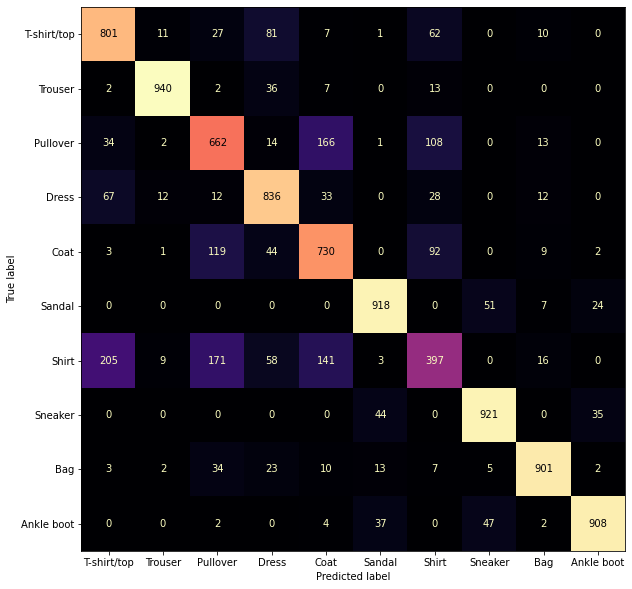

In [78]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(14, 10))
ConfusionMatrixDisplay.from_predictions(test_labels, y_preds, colorbar=False, ax=ax, display_labels=class_names, cmap='magma');

In [130]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Pick a random image, plot it and labels it with a prediction and true label.
  """

  # Set a random integer
  i = random.randint(0, len(images))

  # Create prediction and target
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # Add Xlabel information (Prediction/true label)
  plt.xlabel(f'pred : {pred_label} {100*tf.reduce_max(pred_probs):2.0f}% (True : {true_label})', color=color)

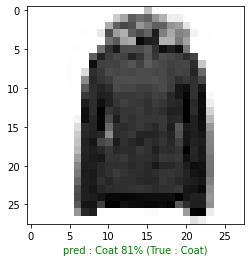

In [146]:
plot_random_image(model_8, test_data_norm, test_labels, class_names)

In [148]:
# Model Internals

In [149]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 3140      
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [150]:
model_8.layers

In [156]:
weights, bies = model_8.layers[1].get_weights()

In [159]:
weights, weights.shape

(array([[ 0.38586003, -0.0168326 , -0.486146  , -0.538174  ],
        [ 0.09176367, -0.07343119, -0.27991337,  0.0482569 ],
        [ 0.4390812 ,  0.4648392 , -0.64234924, -0.44438997],
        ...,
        [-0.25405505,  0.53794205, -0.15410833,  0.15027729],
        [-0.23082405,  0.4549202 ,  0.0833149 , -0.3790478 ],
        [ 0.15038253,  0.13788202, -0.14806928, -0.01065948]],
       dtype=float32), (784, 4))

In [158]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 3140      
                                                                 
 dense_20 (Dense)            (None, 4)                 20        
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [160]:
bies, bies.shape

(array([-0.07772537,  0.08738928, -0.36895895,  0.72360265], dtype=float32),
 (4,))

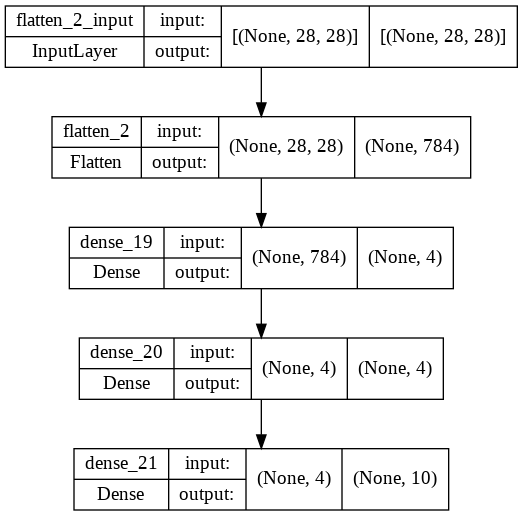

In [162]:
from tensorflow.keras.utils import plot_model
plot_model(model_8, show_shapes=True)